## Business Understanding

Clearly capable professionals in all fields IT-related are heavily sought after specialists and have been for some time. Since Data Science in itself is a relatively new field, up to date there are only few professionals with a classic education on the subject. I want to get a clearer picture of a possible difference in salary across different countries for those people who did online programms of any kind to educate themselves on this subject and drive there career with it.

1. Is there a difference between continents regarding the mean workinghours per week?
2. Is there a difference between different age groups regarding the mean working hours per week?
3. Is there a difference between gender when it comes to workinghours perweek?
4. Is there a difference in the distribution across continents when it comes to age_groups and gender regarding the mean working hours per week?

## Data Understanding

In [1]:
#Load in the relevant libraries to understand what kind of data we are looking at here
#maybe I overdid it a bit here :) 
import pandas as pd
import seaborn as sns
sns.set()

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#again import the relevant libraries for the task at hand
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from functions import *

In [2]:
#read in the relevant dataset
df = pd.read_csv('survey_results_public.csv')

In [3]:
#show the first five rows of the dataset
df.head()

Respondent                                         MainBranch Hobbyist  \
0           1             I am a student who is learning to code      Yes   
1           2             I am a student who is learning to code       No   
2           3  I am not primarily a developer, but I write co...      Yes   
3           4                     I am a developer by profession       No   
4           5                     I am a developer by profession      Yes   

                  OpenSourcer  \
0                       Never   
1     Less than once per year   
2                       Never   
3                       Never   
4  Once a month or more often   

                                          OpenSource  \
0  The quality of OSS and closed source software ...   
1  The quality of OSS and closed source software ...   
2  The quality of OSS and closed source software ...   
3  The quality of OSS and closed source software ...   
4  OSS is, on average, of HIGHER quality than pro...   

                               Employment                 Country  \
0  Not employed, and not looking for work          United Kingdom   
1      Not employed, but looking for work  Bosnia and Herzegovina   
2                      Employed full-time                Thailand   
3                      Employed full-time           United States   
4                      Employed full-time                 Ukraine   

          Student                                            EdLevel  \
0              No                          Primary/elementary school   
1  Yes, full-time  Secondary school (e.g. American high school, G...   
2              No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
3              No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4              No           Bachelor’s degree (BA, BS, B.Eng., etc.)   

                                      UndergradMajor  ...  \
0                                                NaN  ...   
1                                                NaN  ...   
2                      Web development or web design  ...   
3  Computer science, computer engineering, or sof...  ...   
4  Computer science, computer engineering, or sof...  ...   

                             WelcomeChange  \
0  Just as welcome now as I felt last year   
1  Just as welcome now as I felt last year   
2  Just as welcome now as I felt last year   
3  Just as welcome now as I felt last year   
4  Just as welcome now as I felt last year   

                                        SONewContent   Age Gender Trans  \
0  Tech articles written by other developers;Indu...  14.0    Man    No   
1  Tech articles written by other developers;Indu...  19.0    Man    No   
2  Tech meetups or events in your area;Courses on...  28.0    Man    No   
3  Tech articles written by other developers;Indu...  22.0    Man    No   
4  Tech meetups or events in your area;Courses on...  30.0    Man    No   

                 Sexuality                                 Ethnicity  \
0  Straight / Heterosexual                                       NaN   
1  Straight / Heterosexual                                       NaN   
2  Straight / Heterosexual                                       NaN   
3  Straight / Heterosexual              White or of European descent   
4  Straight / Heterosexual  White or of European descent;Multiracial   

  Dependents           SurveyLength                  SurveyEase  
0         No  Appropriate in length  Neither easy nor difficult  
1         No  Appropriate in length  Neither easy nor difficult  
2        Yes  Appropriate in length  Neither easy nor difficult  
3         No  Appropriate in length                        Easy  
4         No  Appropriate in length                        Easy  

[5 rows x 85 columns]

In [4]:
schema = pd.read_csv('survey_results_schema.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

((88883, 85),
 None,
          Respondent     CompTotal  ConvertedComp   WorkWeekHrs    CodeRevHrs  \
 count  88883.000000  5.594500e+04   5.582300e+04  64503.000000  49790.000000   
 mean   44442.000000  5.519014e+11   1.271107e+05     42.127197      5.084308   
 std    25658.456325  7.331926e+13   2.841523e+05     37.287610      5.513931   
 min        1.000000  0.000000e+00   0.000000e+00      1.000000      0.000000   
 25%    22221.500000  2.000000e+04   2.577750e+04     40.000000      2.000000   
 50%    44442.000000  6.200000e+04   5.728700e+04     40.000000      4.000000   
 75%    66662.500000  1.200000e+05   1.000000e+05     44.750000      6.000000   
 max    88883.000000  1.000000e+16   2.000000e+06   4850.000000     99.000000   
 
                 Age  
 count  79210.000000  
 mean      30.336699  
 std        9.178390  
 min        1.000000  
 25%       24.000000  
 50%       29.000000  
 75%       35.000000  
 max       99.000000  ,
 <AxesSubplot:>)

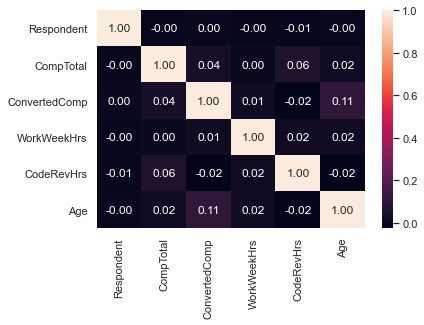

In [5]:
explore_data(df)

With the total amount of rows bein 88883, there is quiete a lot of columns with missing values. Also, a large portion of the dataset consists of categorical values

There are almost no correlations between the numeric data fields, with the highest being between "ConvertedComp" and "Age" followed by "CodeRevHrs" and "CompTotal"

## Prepare Data - Part 1

### Defining the relevant Functions

All possibly relevant functions stored in functions.py

## Prepare the Data

### Cleaning the Data

Let's devide the df into numeric and categorical values to see what's what and to make it easier to decide which columns are needed to answer the business questions.

In [6]:
num_df = df.select_dtypes(include=['float', 'int']).columns
num_df

Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age'],
      dtype='object')

In [7]:
cat_df = df.select_dtypes(include=['object']).copy().columns
cat_df

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompFreq', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'SOVi

Let's only take those columns out of df, that are beneficial to answering the business questions

In [8]:
#also sort the remaining columns a litte
relevant_df = df[['Respondent',
                  'JobSat', 
                  'CareerSat',
                  'Country',
                  'Gender',
                  'Sexuality',
                  'Ethnicity',
                  'DevType',
                  'Age',
                  'WorkWeekHrs',
                 ]]

To answer our prime business question, we need to take a closer look at the variables 'WorkWeekHrs' and 'Country'

In [9]:
num_df = relevant_df.select_dtypes(include=['float'])
cat_df = relevant_df.select_dtypes(include=['object']).copy()

Well, this data looks very weird, given that a week has 168 hours total. Assuming one does have to sleep (let's say 8 hours a day) to just keep functioning, that leaves us with a max of 112 hours per week, one is potentially awake. So I'll set 112 hours as maximum and cut everything above out.

In [10]:
#drop every row with nan as value
df_work_week_no_nan = relevant_df.dropna(subset=['WorkWeekHrs'], axis=0).copy()

In [11]:
#check if dropping the nulls in WorkWeekHrs worked
df_work_week_no_nan['WorkWeekHrs'].isnull().mean()

0.0

In [12]:
#remove everything above the threshold of 112 working hours per week
df_work_week_no_nan = df_work_week_no_nan[df_work_week_no_nan['WorkWeekHrs'].between(0,112)]
df_work_week_no_nan['WorkWeekHrs'].max()

112.0

In [13]:
#that still leaves us with plenty of data, even with the nan-values in the column 'WorkWeekHrs' removed
df_work_week_no_nan.shape

(63996, 10)

In [14]:
#reset index for current df after all that
df_work_week_no_nan = df_work_week_no_nan.reset_index()

In [15]:
#create a checkpoint
df_work_country = df_work_week_no_nan.copy()

In [16]:
#Now, let's see how many respondants we have as a base grouped by the different countries
respondents_per_country = df_work_country.groupby('Country')['Respondent'].count().sort_values(ascending=False)
respondents_per_country.unique()

array([16420,  5555,  4499,  4347,  2502,  1775,  1531,  1448,  1426,
        1391,  1311,  1273,  1098,   985,   747,   691,   639,   595,
         551,   550,   549,   544,   531,   504,   483,   478,   467,
         452,   434,   407,   403,   400,   385,   359,   358,   341,
         321,   295,   278,   274,   244,   237,   225,   223,   210,
         205,   196,   182,   178,   171,   162,   153,   152,   151,
         136,   128,   121,   111,   109,   108,    99,    97,    94,
          86,    83,    76,    74,    66,    62,    61,    60,    59,
          57,    53,    52,    51,    50,    45,    44,    43,    42,
          40,    35,    32,    28,    27,    26,    25,    24,    22,
          20,    19,    18,    17,    16,    15,    14,    13,    12,
          11,    10,     9,     8,     7,     6,     5,     3,     2,
           1])

We have quiete a lot of countries with a very small number of respondants, so I will make a cut at 20 respondants, so that I do not depriviate the final results of their relevance

In [17]:
df_work_country = df_work_country.drop(['index'], axis=1)

In [18]:
df_work_country = df_work_country.copy()
df_work_country

Respondent                              JobSat  \
0               3                  Slightly satisfied   
1               4                  Slightly satisfied   
2               5               Slightly dissatisfied   
3               6                  Slightly satisfied   
4               7  Neither satisfied nor dissatisfied   
...           ...                                 ...   
63991       88878                      Very satisfied   
63992       88879  Neither satisfied nor dissatisfied   
63993       88881  Neither satisfied nor dissatisfied   
63994       88882                   Very dissatisfied   
63995       88883               Slightly dissatisfied   

                                CareerSat        Country Gender  \
0                      Slightly satisfied       Thailand    Man   
1                          Very satisfied  United States    Man   
2                       Very dissatisfied        Ukraine    Man   
3                          Very satisfied         Canada    Man   
4                      Slightly satisfied        Ukraine    Man   
...                                   ...            ...    ...   
63991                      Very satisfied  United States    Man   
63992                  Slightly satisfied        Finland    Man   
63993  Neither satisfied nor dissatisfied        Austria    Man   
63994               Slightly dissatisfied    Netherlands    Man   
63995               Slightly dissatisfied         Greece    Man   

                     Sexuality                                 Ethnicity  \
0      Straight / Heterosexual                                       NaN   
1      Straight / Heterosexual              White or of European descent   
2      Straight / Heterosexual  White or of European descent;Multiracial   
3      Straight / Heterosexual                                East Asian   
4      Straight / Heterosexual              White or of European descent   
...                        ...                                       ...   
63991  Straight / Heterosexual                               South Asian   
63992  Straight / Heterosexual              White or of European descent   
63993  Straight / Heterosexual              White or of European descent   
63994  Straight / Heterosexual              White or of European descent   
63995  Straight / Heterosexual              White or of European descent   

                                                 DevType   Age  WorkWeekHrs  
0      Designer;Developer, back-end;Developer, front-...  28.0        40.00  
1                                  Developer, full-stack  22.0        80.00  
2      Academic researcher;Developer, desktop or ente...  30.0        55.00  
3      Data or business analyst;Data scientist or mac...  28.0        15.00  
4                          Designer;Developer, front-end  42.0        32.00  
...                                                  ...   ...          ...  
63991  Developer, back-end;Developer, front-end;Devel...  26.0        40.00  
63992  Developer, desktop or enterprise applications;...  34.0        37.75  
63993   Developer, full-stack;Engineer, site reliability  37.0        39.00  
63994  Academic researcher;Database administrator;Dev...   NaN        40.00  
63995  Developer, back-end;Developer, desktop or ente...  33.0        48.00  

[63996 rows x 10 columns]

In [19]:
#drop all rows with only nan-values (finally)
df_work_country = df_work_country.dropna(how='all')
df_work_country = df_work_country.dropna(subset=['Country'], axis=0).copy()

## Prepare Data - Part 1: Mean Working Hours per Week by Country

In [20]:
#limit to countries with at least 15 participants
df_country_above_15 = pd.DataFrame(df_work_country['Country'].value_counts() >14)
df_country_above_15 = df_country_above_15.reset_index()
df_country_above_15 = df_country_above_15.query('Country==True')
df_country_above_15

index  Country
0     United States     True
1             India     True
2    United Kingdom     True
3           Germany     True
4            Canada     True
..              ...      ...
106        Zimbabwe     True
107        Honduras     True
108            Iraq     True
109         Jamaica     True
110     Afghanistan     True

[111 rows x 2 columns]

In [21]:
#get the mean WorkWeekHrs for those countries
country_list = df_country_above_15['index'].to_list()
df_country_filtered = df_work_country[df_work_country['Country'].isin(country_list)]
df_country = df_country_filtered.groupby('Country')['WorkWeekHrs'].mean().sort_values(ascending=False)
df_country

Country
United Republic of Tanzania                  45.800000
The former Yugoslav Republic of Macedonia    44.738095
Lebanon                                      44.469880
China                                        44.322815
Iran                                         43.965739
                                               ...    
Venezuela, Bolivarian Republic of...         35.846154
Algeria                                      35.130952
Uganda                                       33.862745
Bolivia                                      33.035714
Myanmar                                      28.240000
Name: WorkWeekHrs, Length: 111, dtype: float64

In [22]:
len(df_country)

111

In [23]:
df_mean_work_country = df_country.copy()

And there we finally have it, the mean of working hours in all countries with at least 15 respondants. It seems here in Germany, we have it quiete nice actually! :)
But since we have 105 countries in that list, it will be quiete difficult to visualize that result in a neat way!

In [24]:
#change our hard earned series back into pandas.dataframe
df_mean_work_country.to_frame()

WorkWeekHrs
Country                                               
United Republic of Tanzania                  45.800000
The former Yugoslav Republic of Macedonia    44.738095
Lebanon                                      44.469880
China                                        44.322815
Iran                                         43.965739
...                                                ...
Venezuela, Bolivarian Republic of...         35.846154
Algeria                                      35.130952
Uganda                                       33.862745
Bolivia                                      33.035714
Myanmar                                      28.240000

[111 rows x 1 columns]

In [25]:
#reset index to get proper dataframe callable for a plot
df_mean_work_country = df_mean_work_country.reset_index()

In [26]:
#display the new df with work hours mean and country
df_mean_work_country

Country  WorkWeekHrs
0                  United Republic of Tanzania    45.800000
1    The former Yugoslav Republic of Macedonia    44.738095
2                                      Lebanon    44.469880
3                                        China    44.322815
4                                         Iran    43.965739
..                                         ...          ...
106       Venezuela, Bolivarian Republic of...    35.846154
107                                    Algeria    35.130952
108                                     Uganda    33.862745
109                                    Bolivia    33.035714
110                                    Myanmar    28.240000

[111 rows x 2 columns]

In [27]:
comp_df = df_mean_work_country.copy()

In [28]:
comp_df.columns.values

array(['Country', 'WorkWeekHrs'], dtype=object)

In [29]:
comp_df.nlargest(len(comp_df['WorkWeekHrs']), 'WorkWeekHrs').plot.line(x='Country', y='WorkWeekHrs')
plt.title('Mean Work per Week in Hrs')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Mean Work per Week in Hrs')

In [30]:
#diff(arr, axis = 0))
comp_df['Diff_Mean_Val'] = comp_df['WorkWeekHrs'] - (comp_df['WorkWeekHrs'].mean())
comp_df

Country  WorkWeekHrs  Diff_Mean_Val
0                  United Republic of Tanzania    45.800000       6.232469
1    The former Yugoslav Republic of Macedonia    44.738095       5.170564
2                                      Lebanon    44.469880       4.902348
3                                        China    44.322815       4.755284
4                                         Iran    43.965739       4.398207
..                                         ...          ...            ...
106       Venezuela, Bolivarian Republic of...    35.846154      -3.721378
107                                    Algeria    35.130952      -4.436579
108                                     Uganda    33.862745      -5.704786
109                                    Bolivia    33.035714      -6.531817
110                                    Myanmar    28.240000     -11.327531

[111 rows x 3 columns]

In [31]:
df_overview = pd.DataFrame()
df_overview['Total Number of Countries'] = [comp_df.shape[0]]
df_overview['Mean workinghours'] = [comp_df['WorkWeekHrs'].mean()]
df_overview['Number of Countries higher than mean'] = [comp_df['Diff_Mean_Val'].gt(0).sum()]
df_overview['Number of Countries lower than mean'] = [comp_df['Diff_Mean_Val'].lt(0).sum()]
df_overview

Total Number of Countries  Mean workinghours  \
0                        111          39.567531   

   Number of Countries higher than mean  Number of Countries lower than mean  
0                                    59                                   52

Given that we have a total number of countries of 105 in the dataset, further analysis on the basis of countries would likely be difficult to interpret and also hard to visualize in a meaningfull way. So I decided to go to a higher level of detail and do further analysis on continent level. 

In [32]:
#For that, I found a neat python script on 
##https://gist.github.com/pamelafox/986163
#which has continent information for all countries
from countryinfo import countries

In [33]:
#create a dataframe from the python file input
data = pd.DataFrame()
for i in countries:
    country = pd.DataFrame(i)
    data = data.append(country, ignore_index=True)

In [34]:
#clean dataframe, dropping duplicates as from merging we have lots of duplicate country rows and only need one per country
data.drop_duplicates(subset=['name'], keep='first', inplace=True)
data = data.reset_index(drop=True)

In [35]:
#merge the continent dataframe with our previous df on country information
df_with_continent = pd.merge(comp_df, data, how='left', left_on='Country', right_on='name')

#drop rows that don't have a continent information
df_with_continent = df_with_continent.dropna(subset=['continent'], axis=0)

In [36]:
df_with_continent = df_with_continent.drop(['Country'], axis=1)

In [37]:
df_with_continent.columns.values

array(['WorkWeekHrs', 'Diff_Mean_Val', 'timezones', 'code', 'continent',
       'name', 'capital'], dtype=object)

In [38]:
cols = ['timezones', 
        'code', 
        'continent',
        'name', 
        'capital',
        'Diff_Mean_Val',
        'WorkWeekHrs'
       ]

In [39]:
df_with_continent = df_with_continent[cols]
df_with_continent

timezones code      continent       name         capital  \
2          Asia/Beirut   LB           Asia    Lebanon          Beirut   
4          Asia/Tehran   IR           Asia       Iran          Tehran   
5        Africa/Harare   ZW         Africa   Zimbabwe          Harare   
7    America/Guatemala   GT  North America  Guatemala  Guatemala City   
8       Asia/Jerusalem   IL           Asia     Israel       Jerusalem   
..                 ...  ...            ...        ...             ...   
105  Africa/Casablanca   MA         Africa    Morocco           Rabat   
107     Africa/Algiers   DZ         Africa    Algeria         Algiers   
108     Africa/Kampala   UG         Africa     Uganda         Kampala   
109     America/La_Paz   BO  South America    Bolivia           Sucre   
110       Asia/Rangoon   MM           Asia    Myanmar       Naypyidaw   

     Diff_Mean_Val  WorkWeekHrs  
2         4.902348    44.469880  
4         4.398207    43.965739  
5         4.099135    43.666667  
7         3.822469    43.390000  
8         3.631166    43.198698  
..             ...          ...  
105      -3.269286    36.298246  
107      -4.436579    35.130952  
108      -5.704786    33.862745  
109      -6.531817    33.035714  
110     -11.327531    28.240000  

[97 rows x 7 columns]

In [40]:
df_overview = pd.DataFrame()
df_overview['Total Number of Countries'] = [df_with_continent.shape[0]]
df_overview['Mean workinghours'] = [df_with_continent['WorkWeekHrs'].mean()]
df_overview['Number of Countries higher than mean'] = [df_with_continent['Diff_Mean_Val'].gt(0).sum()]
df_overview['Number of Countries lower than mean'] = [df_with_continent['Diff_Mean_Val'].lt(0).sum()]
df_overview

Total Number of Countries  Mean workinghours  \
0                         97          39.408154   

   Number of Countries higher than mean  Number of Countries lower than mean  
0                                    50                                   47

There seems to be a bit of a loss here, since the dataset got smaller. That's likely due to the fact, that not all countries are in the given converter after all. Since the mean stayed relatively the same and there are just short of 100 datapoints left, let's continue with the given dataset.

## Model Data - Part 1: Mean Working Hours per Week by Country

In [41]:
#extract information for visual analysis (mean age of 1st coding experience by continent)
continent_means_workhrs = df_with_continent.groupby('continent')['WorkWeekHrs'].mean().sort_values(ascending=False).values
continents = df_with_continent.groupby('continent')['WorkWeekHrs'].mean().sort_values(ascending=False).index

In [141]:
#bar chart for analyzing the mean age of 1st coding experience by continents
barplot, fig, ax = create_bar_v_plot(x_values=continents, y_values=continent_means_workhrs, x_label='Continents', 
                                     chart_title='Mean workinghours per week by continent')

autolabel(barplot, ax)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig('mean_WorkWeekHrs_by_continent.png');

In [43]:
freetime = 40.61 - 39.42
yearly_freetime = freetime * 52
yearly_freetime

61.87999999999988

The graph shows, that overall the mean workinghours per week don't differ too much from continent to continent. Having said that, there is a total difference of two hours between North America and Africa, with North America having a mean workinghours per week of 40.61 and Africa having a mean workinghours per week of 38.34. 

Interestingly, Europe is in the lower part of the graph with a mean of 39.42, more than an hour less than the North American colleagues work. That's an amazing 61.88 hours of freetime, European respondants have to enjoy in a year!

## Prepare Data - Part 2: Differences by age

*variables of interest: Age, WorkWeekHrs*

Question: How do working hours per week differ in age?

In [44]:
df_work_country

Respondent                              JobSat  \
0               3                  Slightly satisfied   
1               4                  Slightly satisfied   
2               5               Slightly dissatisfied   
3               6                  Slightly satisfied   
4               7  Neither satisfied nor dissatisfied   
...           ...                                 ...   
63991       88878                      Very satisfied   
63992       88879  Neither satisfied nor dissatisfied   
63993       88881  Neither satisfied nor dissatisfied   
63994       88882                   Very dissatisfied   
63995       88883               Slightly dissatisfied   

                                CareerSat        Country Gender  \
0                      Slightly satisfied       Thailand    Man   
1                          Very satisfied  United States    Man   
2                       Very dissatisfied        Ukraine    Man   
3                          Very satisfied         Canada    Man   
4                      Slightly satisfied        Ukraine    Man   
...                                   ...            ...    ...   
63991                      Very satisfied  United States    Man   
63992                  Slightly satisfied        Finland    Man   
63993  Neither satisfied nor dissatisfied        Austria    Man   
63994               Slightly dissatisfied    Netherlands    Man   
63995               Slightly dissatisfied         Greece    Man   

                     Sexuality                                 Ethnicity  \
0      Straight / Heterosexual                                       NaN   
1      Straight / Heterosexual              White or of European descent   
2      Straight / Heterosexual  White or of European descent;Multiracial   
3      Straight / Heterosexual                                East Asian   
4      Straight / Heterosexual              White or of European descent   
...                        ...                                       ...   
63991  Straight / Heterosexual                               South Asian   
63992  Straight / Heterosexual              White or of European descent   
63993  Straight / Heterosexual              White or of European descent   
63994  Straight / Heterosexual              White or of European descent   
63995  Straight / Heterosexual              White or of European descent   

                                                 DevType   Age  WorkWeekHrs  
0      Designer;Developer, back-end;Developer, front-...  28.0        40.00  
1                                  Developer, full-stack  22.0        80.00  
2      Academic researcher;Developer, desktop or ente...  30.0        55.00  
3      Data or business analyst;Data scientist or mac...  28.0        15.00  
4                          Designer;Developer, front-end  42.0        32.00  
...                                                  ...   ...          ...  
63991  Developer, back-end;Developer, front-end;Devel...  26.0        40.00  
63992  Developer, desktop or enterprise applications;...  34.0        37.75  
63993   Developer, full-stack;Engineer, site reliability  37.0        39.00  
63994  Academic researcher;Database administrator;Dev...   NaN        40.00  
63995  Developer, back-end;Developer, desktop or ente...  33.0        48.00  

[63996 rows x 10 columns]

In [45]:
#First, let's see what kind of data we have in Age
df_work_country['Age'].unique()

array([28. , 22. , 30. , 42. , 23. ,  nan, 31. , 26. , 29. , 47. , 34. ,
       32. , 21. , 25. , 35. , 44. , 27. , 43. , 62. , 37. , 45. , 18. ,
       33. , 38. , 19. , 24. , 36. , 39. , 64. , 41. , 49. , 54. , 40. ,
       56. , 58. , 46. , 51. , 48. , 16. , 57. , 52. , 50. , 23.9, 55. ,
       20. , 67. ,  1. , 53. , 59. , 69. , 65. , 63. , 61. , 17. , 70. ,
       60. , 46.5, 71. , 29.5, 68. , 26.5, 26.3, 72. , 66. , 75. , 15. ,
       24.5, 99. , 43.5, 22.5, 31.5, 28.5, 33.6, 12. ,  2. , 73. , 30.8,
       24.8, 38.5, 90. , 61.3,  4. , 74. , 13. , 85. , 23.5, 77. , 20.9,
        3. , 14. , 37.5,  5. , 98. , 84. , 37.3, 31.4, 95. ])

In [46]:
df_work_country['Age'].isnull().value_counts()

False    60063
True      3933
Name: Age, dtype: int64

In [47]:
#percentage of rows with nan as age
nan_perc = (3933 / 60063)*100
nan_perc

6.548124469307227

We definatly need to deal with the nan values. Imputing them can be tricky here, since it would derive meaning from the results.

In [48]:
#dropping all nan values in age
df_age_no_nan = df_work_country.dropna(subset=['Age'], axis=0)
df_age_no_nan['Age'].isnull().mean()

0.0

In [49]:
#remaining rows should be 60063
df_age_no_nan.shape[0]

60063

Since it's pretty hard again to visualize results in a meaningfull way with so much age values, let's grop them together to try and get a better understanding of the question that way.

In [50]:
#checkpoint
df_age_clean = df_age_no_nan.copy()

In [51]:
#https://stackoverflow.com/questions/32633977/how-to-create-categorical-variable-based-on-a-numerical-variable
#create buckets from the age variable
df_age_clean['Age Cluster'] = pd.cut(df_age_clean['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, float('Inf')], labels=['under10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70 and older'])

In [52]:
#Data of over 70 years seems unplausible > drop those rows
index_to_drop = df_age_clean.query('Age<=10 or Age>=70').index
df_age_clean.drop(index_to_drop, inplace=True)

In [53]:
#overview of the buckets
df_age_clean['Age Cluster'].value_counts()

20-30           31797
30-40           19159
40-50            5624
50-60            1786
10-20            1288
60-70             343
70 and older        0
under10             0
Name: Age Cluster, dtype: int64

In [54]:
df_age_clean.columns.values

array(['Respondent', 'JobSat', 'CareerSat', 'Country', 'Gender',
       'Sexuality', 'Ethnicity', 'DevType', 'Age', 'WorkWeekHrs',
       'Age Cluster'], dtype=object)

In [55]:
#rearange a litte
cols = ['Respondent', 'JobSat', 'CareerSat', 'Country', 'Gender',
       'Sexuality', 'Ethnicity', 'DevType', 'Age', 
       'Age Cluster', 'WorkWeekHrs']

In [56]:
df_age_clean = df_age_clean[cols]
df_age_clean

Respondent                              JobSat  \
0               3                  Slightly satisfied   
1               4                  Slightly satisfied   
2               5               Slightly dissatisfied   
3               6                  Slightly satisfied   
4               7  Neither satisfied nor dissatisfied   
...           ...                                 ...   
63990       88877                      Very satisfied   
63991       88878                      Very satisfied   
63992       88879  Neither satisfied nor dissatisfied   
63993       88881  Neither satisfied nor dissatisfied   
63995       88883               Slightly dissatisfied   

                                CareerSat        Country Gender  \
0                      Slightly satisfied       Thailand    Man   
1                          Very satisfied  United States    Man   
2                       Very dissatisfied        Ukraine    Man   
3                          Very satisfied         Canada    Man   
4                      Slightly satisfied        Ukraine    Man   
...                                   ...            ...    ...   
63990                      Very satisfied  United States    Man   
63991                      Very satisfied  United States    Man   
63992                  Slightly satisfied        Finland    Man   
63993  Neither satisfied nor dissatisfied        Austria    Man   
63995               Slightly dissatisfied         Greece    Man   

                     Sexuality                                 Ethnicity  \
0      Straight / Heterosexual                                       NaN   
1      Straight / Heterosexual              White or of European descent   
2      Straight / Heterosexual  White or of European descent;Multiracial   
3      Straight / Heterosexual                                East Asian   
4      Straight / Heterosexual              White or of European descent   
...                        ...                                       ...   
63990  Straight / Heterosexual                               South Asian   
63991  Straight / Heterosexual                               South Asian   
63992  Straight / Heterosexual              White or of European descent   
63993  Straight / Heterosexual              White or of European descent   
63995  Straight / Heterosexual              White or of European descent   

                                                 DevType   Age Age Cluster  \
0      Designer;Developer, back-end;Developer, front-...  28.0       20-30   
1                                  Developer, full-stack  22.0       20-30   
2      Academic researcher;Developer, desktop or ente...  30.0       20-30   
3      Data or business analyst;Data scientist or mac...  28.0       20-30   
4                          Designer;Developer, front-end  42.0       40-50   
...                                                  ...   ...         ...   
63990  Data scientist or machine learning specialist;...  48.0       40-50   
63991  Developer, back-end;Developer, front-end;Devel...  26.0       20-30   
63992  Developer, desktop or enterprise applications;...  34.0       30-40   
63993   Developer, full-stack;Engineer, site reliability  37.0       30-40   
63995  Developer, back-end;Developer, desktop or ente...  33.0       30-40   

       WorkWeekHrs  
0            40.00  
1            80.00  
2            55.00  
3            15.00  
4            32.00  
...            ...  
63990        45.00  
63991        40.00  
63992        37.75  
63993        39.00  
63995        48.00  

[59997 rows x 11 columns]

## Model Data - Part 2: Differences by age

In [257]:
#plot barcharts for age groups and workweekhrs mean
age_cluster_vals = df_age_clean.groupby('Age Cluster')['WorkWeekHrs'].mean().values
age_cluster_idx = df_age_clean.groupby('Age Cluster')['WorkWeekHrs'].mean().index

barplot, fig, ax = create_bar_h_plot(x_values=age_cluster_idx, y_values=age_cluster_vals, 
                                   x_label='Mean workinghours', 
                                   chart_title='Mean workinghours per week by Age')

plt.savefig('workweekhrs_by_age_cluster');

The older the respondant generally, the longer are the workweeks with the exeption of respondants from age 60 to 70 (so basically a short term before active retirement). The trend seems logic, given that a lot of younger respondants propably don't work fulltime jobs yet (respondants 10-20 and parts of 20-30. After that, the mean workinghours per week rise, the older the respondants get, peaking in ages 50-60.

## Prepare Data - Part 2: Distribution Mean workinghours for age clusters by continents

Let's see how the mean workinghours stretch out across the different age cluster by continents, to see if there are any majore differences

In [258]:
df_work_age_country = pd.merge(df_age_clean, df_with_continent, how='left', left_on='Country', right_on='name')
#df_work_age_country = df_work_age_country.drop(['Diff_Mean_Val', 'WorkWeekHrs_y'], axis=1)
df_work_age_country.head()

Respondent                              JobSat           CareerSat  \
0           3                  Slightly satisfied  Slightly satisfied   
1           4                  Slightly satisfied      Very satisfied   
2           5               Slightly dissatisfied   Very dissatisfied   
3           6                  Slightly satisfied      Very satisfied   
4           7  Neither satisfied nor dissatisfied  Slightly satisfied   

         Country Gender                Sexuality  \
0       Thailand    Man  Straight / Heterosexual   
1  United States    Man  Straight / Heterosexual   
2        Ukraine    Man  Straight / Heterosexual   
3         Canada    Man  Straight / Heterosexual   
4        Ukraine    Man  Straight / Heterosexual   

                                  Ethnicity  \
0                                       NaN   
1              White or of European descent   
2  White or of European descent;Multiracial   
3                                East Asian   
4              White or of European descent   

                                             DevType   Age Age Cluster  \
0  Designer;Developer, back-end;Developer, front-...  28.0       20-30   
1                              Developer, full-stack  22.0       20-30   
2  Academic researcher;Developer, desktop or ente...  30.0       20-30   
3  Data or business analyst;Data scientist or mac...  28.0       20-30   
4                      Designer;Developer, front-end  42.0       40-50   

   WorkWeekHrs_x         timezones code      continent           name  \
0           40.0      Asia/Bangkok   TH           Asia       Thailand   
1           80.0  America/New_York   US  North America  United States   
2           55.0       Europe/Kiev   UA         Europe        Ukraine   
3           15.0  America/St_Johns   CA  North America         Canada   
4           32.0       Europe/Kiev   UA         Europe        Ukraine   

            capital  Diff_Mean_Val  WorkWeekHrs_y  
0           Bangkok      -0.016750      39.550781  
1  Washington, D.C.       2.494621      42.062153  
2              Kiev      -0.734198      38.833333  
3            Ottawa       0.396238      39.963769  
4              Kiev      -0.734198      38.833333

In [259]:
df_work_age_country = df_work_age_country.dropna(subset=['continent'], axis=0)

In [260]:
df_work_age_country['continent'].isnull().mean()

0.0

In [261]:
df_work_age_country['Age Cluster'] = df_work_age_country['Age Cluster'].astype('object')
df_work_age_country['Age_Cluster'] = df_work_age_country['Age Cluster']

In [262]:
#there are much more respondants in the age_cluster 20-30 than in any other, 
#so we have to take samples with the same size of each age_cluster and then plot the mean
df_20to30 = df_work_age_country.query('Age_Cluster == "20-30"').sample(frac=1).reset_index(drop=True)
df_30to40 = df_work_age_country.query('Age_Cluster == "30-40"').sample(frac=1).reset_index(drop=True)
df_40to50 = df_work_age_country.query('Age_Cluster == "40-50"').sample(frac=1).reset_index(drop=True)
df_50to60 = df_work_age_country.query('Age_Cluster == "50-60"').sample(frac=1).reset_index(drop=True)
df_60to70 = df_work_age_country.query('Age_Cluster == "60-70"').sample(frac=1).reset_index(drop=True)

df_20to30_short = df_20to30[:1000]
df_30to40_short = df_30to40[:1000]
df_40to50_short = df_40to50[:1000]
df_50to60_short = df_50to60[:1000]
df_60to70_short = df_50to60[:1000]

In [263]:
#merge the new dfs into one
df_tmp = pd.merge(df_20to30_short, df_30to40_short, how='outer')
df_tmp2 = pd.merge(df_tmp, df_40to50_short, how='outer')
df_tmp3 = pd.merge(df_tmp2, df_50to60_short, how='outer')
df_treemap_age_work = pd.merge(df_tmp3, df_60to70_short, how='outer')

In [264]:
#check if it worked right
print('shape: ', df_treemap_age_work.shape)
print('num 20-30: ', len(df_treemap_age_work[df_treemap_age_work['Age_Cluster'] == '20-30']))
print('num 30-40: ', len(df_treemap_age_work[df_treemap_age_work['Age_Cluster'] == '30-40']))
print('num 40-50: ', len(df_treemap_age_work[df_treemap_age_work['Age_Cluster'] == '40-50']))
print('num 50-60: ', len(df_treemap_age_work[df_treemap_age_work['Age_Cluster'] == '50-60']))
print('num 60-70: ', len(df_treemap_age_work[df_treemap_age_work['Age_Cluster'] == '60-70']))

shape:  (4000, 19)
num 20-30:  1000
num 30-40:  1000
num 40-50:  1000
num 50-60:  1000
num 60-70:  0


In [265]:
df_treemap_age_work.head()

Respondent                              JobSat           CareerSat  \
0       55821  Neither satisfied nor dissatisfied  Slightly satisfied   
1       35130                      Very satisfied      Very satisfied   
2       63566                  Slightly satisfied  Slightly satisfied   
3       31607                  Slightly satisfied  Slightly satisfied   
4       24631  Neither satisfied nor dissatisfied      Very satisfied   

          Country Gender                Sexuality  \
0         Germany    Man  Straight / Heterosexual   
1        Bulgaria    Man  Straight / Heterosexual   
2  United Kingdom    Man  Straight / Heterosexual   
3          Serbia    Man  Straight / Heterosexual   
4           India    Man  Straight / Heterosexual   

                      Ethnicity  \
0  White or of European descent   
1  White or of European descent   
2  White or of European descent   
3  White or of European descent   
4                    East Asian   

                                             DevType   Age Age Cluster  \
0  Database administrator;Developer, back-end;Dev...  23.0       20-30   
1                    Marketing or sales professional  23.0       20-30   
2           Developer, back-end;Developer, front-end  22.0       20-30   
3  Developer, back-end;Developer, front-end;Devel...  27.0       20-30   
4           Developer, back-end;Developer, front-end  27.0       20-30   

   WorkWeekHrs_x        timezones code continent            name    capital  \
0           40.0    Europe/Berlin   DE    Europe         Germany     Berlin   
1           40.0     Europe/Sofia   BG    Europe        Bulgaria      Sofia   
2           55.0    Europe/London   GB    Europe  United Kingdom     London   
3           40.0  Europe/Belgrade   RS    Europe          Serbia   Belgrade   
4           48.0    Asia/Calcutta   IN      Asia           India  New Delhi   

   Diff_Mean_Val  WorkWeekHrs_y Age_Cluster  
0      -0.814955      38.752576       20-30  
1       0.186506      39.754037       20-30  
2      -0.260452      39.307079       20-30  
3      -0.693444      38.874088       20-30  
4       1.468256      41.035788       20-30

## Model Data - Part 2: Distribution Mean workinghours for age clusters by continents

In [266]:
#src: https://plotly.com/python/treemaps/
#create treemap to further analyse total of working hours per week
import plotly.express as px

fig = px.treemap(df_treemap_age_work, path=['continent', 'Age Cluster'], 
                 branchvalues = "total", values='WorkWeekHrs_y')
fig.show()

Having a closer look at the mean workinghours per week by continent, it becomes quiete cleare that there are major differences between North America, Europe, Oceania and Asia, Africa and Sourth America. The first highlights the trend shown in the above bar chart, whereas the latter is the exact opposite of that bar chart.

## Prepare Data: Part 3 - Gender

In [63]:
#create checkpoint
df_age = df_work_country.copy()

In [64]:
df_age

Respondent                              JobSat  \
0               3                  Slightly satisfied   
1               4                  Slightly satisfied   
2               5               Slightly dissatisfied   
3               6                  Slightly satisfied   
4               7  Neither satisfied nor dissatisfied   
...           ...                                 ...   
63991       88878                      Very satisfied   
63992       88879  Neither satisfied nor dissatisfied   
63993       88881  Neither satisfied nor dissatisfied   
63994       88882                   Very dissatisfied   
63995       88883               Slightly dissatisfied   

                                CareerSat        Country Gender  \
0                      Slightly satisfied       Thailand    Man   
1                          Very satisfied  United States    Man   
2                       Very dissatisfied        Ukraine    Man   
3                          Very satisfied         Canada    Man   
4                      Slightly satisfied        Ukraine    Man   
...                                   ...            ...    ...   
63991                      Very satisfied  United States    Man   
63992                  Slightly satisfied        Finland    Man   
63993  Neither satisfied nor dissatisfied        Austria    Man   
63994               Slightly dissatisfied    Netherlands    Man   
63995               Slightly dissatisfied         Greece    Man   

                     Sexuality                                 Ethnicity  \
0      Straight / Heterosexual                                       NaN   
1      Straight / Heterosexual              White or of European descent   
2      Straight / Heterosexual  White or of European descent;Multiracial   
3      Straight / Heterosexual                                East Asian   
4      Straight / Heterosexual              White or of European descent   
...                        ...                                       ...   
63991  Straight / Heterosexual                               South Asian   
63992  Straight / Heterosexual              White or of European descent   
63993  Straight / Heterosexual              White or of European descent   
63994  Straight / Heterosexual              White or of European descent   
63995  Straight / Heterosexual              White or of European descent   

                                                 DevType   Age  WorkWeekHrs  
0      Designer;Developer, back-end;Developer, front-...  28.0        40.00  
1                                  Developer, full-stack  22.0        80.00  
2      Academic researcher;Developer, desktop or ente...  30.0        55.00  
3      Data or business analyst;Data scientist or mac...  28.0        15.00  
4                          Designer;Developer, front-end  42.0        32.00  
...                                                  ...   ...          ...  
63991  Developer, back-end;Developer, front-end;Devel...  26.0        40.00  
63992  Developer, desktop or enterprise applications;...  34.0        37.75  
63993   Developer, full-stack;Engineer, site reliability  37.0        39.00  
63994  Academic researcher;Database administrator;Dev...   NaN        40.00  
63995  Developer, back-end;Developer, desktop or ente...  33.0        48.00  

[63996 rows x 10 columns]

In [65]:
df_age['Gender'].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [66]:
#to impute nan values makes no sense here, since we cannot guess gender, so let's see how many nans we have
df_age['Gender'].isnull().value_counts()

False    62660
True      1336
Name: Gender, dtype: int64

In [67]:
#percentage
gender_null_perc = (1336 / 62660) * 100
gender_null_perc

2.132141717203958

In [68]:
#we can safely drop all nans in Gender, withought deluding the final results
df_age_no_nan = df_age.dropna(subset=['Gender'], axis=0)
df_age_no_nan['Gender'].isnull().mean()

0.0

We have to do some further cleaning, since there are cases where respondants chose multiple answers. Let's regroup to a dataframe with "man", "women", "other", so there's no information lost for the analysis. 

In [69]:
#clean up gender column by assigning non-"Man" or "Woman" values to bucket "other"
df_gender_cleaned = df_age_no_nan.copy()

index_other_gender = df_gender_cleaned.query('Gender not in ["Man", "Woman"]').index
df_gender_cleaned.at[index_other_gender, 'Gender'] = "Other"

In [70]:
df_gender_cleaned['Gender'].shape

(62660,)

## Model Data: Part 3 - Gender

In [296]:
#plot workweekhrs by gender
workweek_vals_gend=df_gender_cleaned.groupby('Gender')['WorkWeekHrs'].mean().sort_values(ascending=False).values
workweek_idx_gend=df_gender_cleaned.groupby('Gender')['WorkWeekHrs'].mean().sort_values(ascending=False).index

barplot, fig, ax = create_bar_v_plot(x_values = workweek_idx_gend, y_values = workweek_vals_gend, 
                                     x_label='Mean working hours', 
                                     chart_title='Mean workinghours per Week by Gender', figwidth=8, figheight=5)

autolabel(barplot, ax)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig('workweekhrs_by_gender');

There are no big differences in mean workinghours per week across genders. That being said, man seem to work the longest weeks on average.

## Prepare Data - Part 3: Distribution Mean workinghours for gender by continents

Let's see how the mean workinghours stretch out across the different genders by continents, to see if there are any majore differences

In [272]:
df_gender_cleaned.head()

Respondent                              JobSat           CareerSat  \
0           3                  Slightly satisfied  Slightly satisfied   
1           4                  Slightly satisfied      Very satisfied   
2           5               Slightly dissatisfied   Very dissatisfied   
3           6                  Slightly satisfied      Very satisfied   
4           7  Neither satisfied nor dissatisfied  Slightly satisfied   

         Country Gender                Sexuality  \
0       Thailand    Man  Straight / Heterosexual   
1  United States    Man  Straight / Heterosexual   
2        Ukraine    Man  Straight / Heterosexual   
3         Canada    Man  Straight / Heterosexual   
4        Ukraine    Man  Straight / Heterosexual   

                                  Ethnicity  \
0                                       NaN   
1              White or of European descent   
2  White or of European descent;Multiracial   
3                                East Asian   
4              White or of European descent   

                                             DevType   Age  WorkWeekHrs  
0  Designer;Developer, back-end;Developer, front-...  28.0         40.0  
1                              Developer, full-stack  22.0         80.0  
2  Academic researcher;Developer, desktop or ente...  30.0         55.0  
3  Data or business analyst;Data scientist or mac...  28.0         15.0  
4                      Designer;Developer, front-end  42.0         32.0

In [277]:
df_work_gender_country = pd.merge(df_gender_cleaned, df_with_continent, how='left', left_on='Country', right_on='name')
df_work_gender_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62660 entries, 0 to 62659
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent     62660 non-null  int64  
 1   JobSat         62580 non-null  object 
 2   CareerSat      62660 non-null  object 
 3   Country        62660 non-null  object 
 4   Gender         62660 non-null  object 
 5   Sexuality      57219 non-null  object 
 6   Ethnicity      57064 non-null  object 
 7   DevType        61812 non-null  object 
 8   Age            59402 non-null  float64
 9   WorkWeekHrs_x  62660 non-null  float64
 10  timezones      58471 non-null  object 
 11  code           58471 non-null  object 
 12  continent      58471 non-null  object 
 13  name           58471 non-null  object 
 14  capital        58471 non-null  object 
 15  Diff_Mean_Val  58471 non-null  float64
 16  WorkWeekHrs_y  58471 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage: 

In [278]:
df_work_gender_country = df_work_gender_country.dropna(subset=['continent'], axis=0)

In [279]:
df_work_gender_country['continent'].isnull().mean()

0.0

In [288]:
#there are much more respondants that are male, than the other two, 
#so we have to take samples with the same size of each gender and then plot the mean
df_male = df_work_gender_country.query('Gender == "Man"').sample(frac=1).reset_index(drop=True)
df_female = df_work_gender_country.query('Gender == "Woman"').sample(frac=1).reset_index(drop=True)
df_other = df_work_gender_country.query('Gender == "Other"').sample(frac=1).reset_index(drop=True)

df_male_short = df_male[:655]
df_female_short = df_female[:655]
df_other_short = df_other[:655]

In [289]:
#merge the new dfs into one
df_tmp = pd.merge(df_male_short, df_female_short, how='outer')
df_treemap_gender_work = pd.merge(df_tmp, df_other_short, how='outer')

In [290]:
#check if it worked right
print('shape: ', df_treemap_gender_work.shape)
print('num Men: ', len(df_treemap_gender_work[df_treemap_gender_work['Gender'] == 'Man']))
print('num Women: ', len(df_treemap_gender_work[df_treemap_gender_work['Gender'] == 'Woman']))
print('num Other: ', len(df_treemap_gender_work[df_treemap_gender_work['Gender'] == 'Other']))

shape:  (1965, 17)
num Men:  655
num Women:  655
num Other:  655


## Model Data - Part 3: Distribution Mean workinghours for gender by continents

In [295]:
#src: https://plotly.com/python/treemaps/
#create treemap to further analyse total of working hours per week
import plotly.express as px

fig = px.treemap(df_treemap_gender_work, path=['continent', 'Gender'], branchvalues = "total", values='WorkWeekHrs_y')
fig.show()

The chart confirms, that overall, the different genders really do work approximatly the same amount every week. Noticeably in Oceania, woman do work less than Men and Other Genders and in Africa women work the shortest weeks topped by other genders.

## Results